# Nonlinear Models for NYC taxi data
- Nonlinear models for predicting fares
    - decision tree
    - random forest
- [kaggle data source](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview)
- [misc taxi info](https://www1.nyc.gov/site/tlc/passengers/taxi-fare.page)

In [1]:
import nyctaxi as nyc
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = nyc.load_data()

In [3]:
df = nyc.clean_data ( df )
df = nyc.add_and_clean_distance( df )

In [4]:
#additional cleaning
#df = df[(df.distance < 40) | (df.fare_amount > 100)]

---

## Split data into training and testing sets

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


y = df['fare_amount']
x = df['distance']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train, x_test = x_train.values.reshape(-1,1), x_test.values.reshape(-1,1)

---

## Decision Tree Regression

In [6]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=6,random_state=0)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred) ** 0.5)

Test RMSE: 3.965


### Decision Tree Visualization

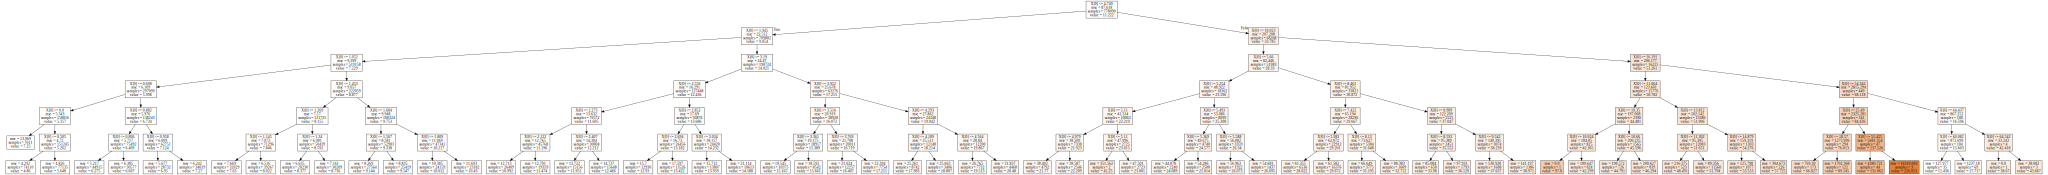

In [7]:
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz 

#plot_tree(dt)
dot_data = export_graphviz(dt, out_file=None, filled=True)
tree = graphviz.Source(dot_data)
tree

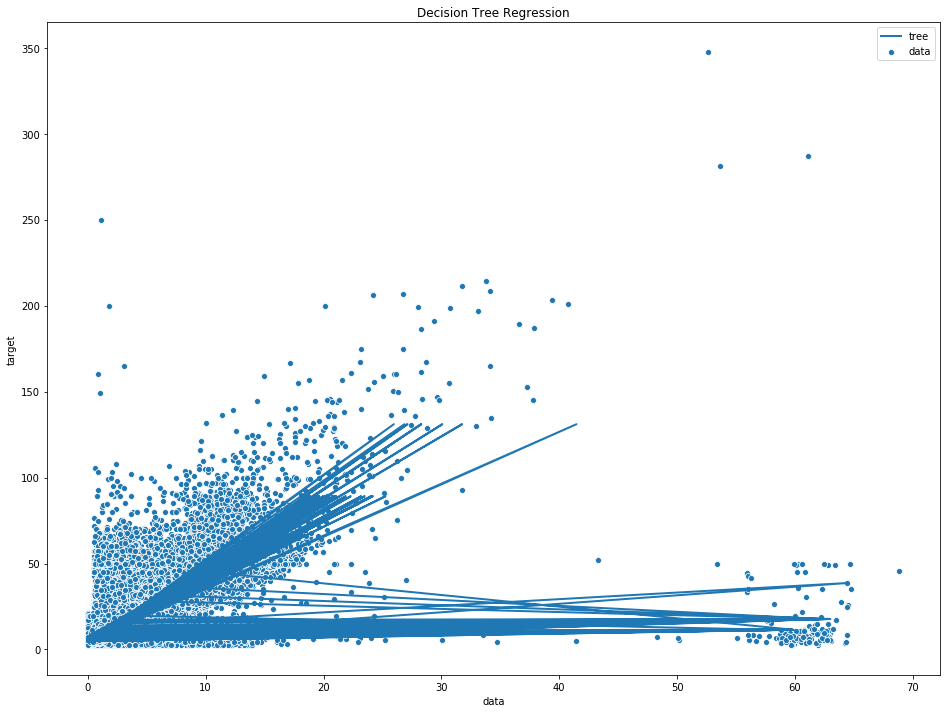

In [8]:
plt.figure(figsize=(16,12))
sns.scatterplot(x, y, label='data')
#plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y_pred, label="tree", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

---

## Random Forest Regression

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=1)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print("Test RMSE: %.3f" % mean_squared_error(y_test, y_pred) ** 0.5)

Test RMSE: 3.982
